# Part I - (Exploratory Analysis of San Francisco Bay Area Gobike Service)
## by (Anuoluwa Ayodele)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [37]:
# load in the dataset into a pandas dataframe.
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [38]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [39]:
#Make copy of the dataframe
bike_copy = bike.copy()

In [40]:
#Drop rows with missing or Null Values
bike_copy = bike_copy.dropna().reset_index(drop=True) 
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [41]:
#Fix wrong data types
bike_copy['start_station_id'] = bike_copy['start_station_id'].astype(int)
bike_copy['end_station_id'] = bike_copy['end_station_id'].astype(int)
bike_copy['member_birth_year'] = bike_copy['member_birth_year'].astype(int)
bike_copy['start_time'] = pd.to_datetime(bike_copy['start_time'])
bike_copy['end_time'] = pd.to_datetime(bike_copy['end_time'])
bike_copy['user_type'] = bike_copy['user_type'].astype('category') 

In [42]:
#Test
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [43]:
!pip install haversine
!pip install mpu

In [44]:
#Import haversine to calculate distance between two geo-locations.
import haversine as hs
import mpu

In [45]:
bike_copy["distance"] = bike_copy.apply(lambda x:
                                  mpu.haversine_distance((x["start_station_latitude"], x["start_station_longitude"]),
                                                         (x["end_station_latitude"], x["end_station_longitude"])), axis=1)

In [46]:
#convert the distance to 2 decimal places
bike_copy.distance = round(bike_copy.distance, 2)
bike_copy.distance

0         0.54
1         2.70
2         0.26
3         2.41
4         3.33
          ... 
174947    1.46
174948    1.40
174949    0.38
174950    0.75
174951    0.71
Name: distance, Length: 174952, dtype: float64

In [47]:
# new columns from start_time
bike_copy['start_weekday'] = bike_copy.start_time.dt.day_name()
bike_copy['start_year'] = bike_copy.start_time.dt.year

# convert seconds to minutes
bike_copy['duration_minutes'] = round(bike_copy['duration_sec']/60).astype(int)

#Get the age of the bike_users
bike_copy['user_age'] = bike_copy['start_year'] - bike_copy['member_birth_year']

In [48]:
bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [49]:
#Remove unwanted columns
bike_copy.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude',
               'member_birth_year','start_year'], axis=1, inplace=True)

#Test

bike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174952 non-null  int64   
 1   start_station_name       174952 non-null  object  
 2   end_station_id           174952 non-null  int64   
 3   end_station_name         174952 non-null  object  
 4   bike_id                  174952 non-null  int64   
 5   user_type                174952 non-null  category
 6   member_gender            174952 non-null  object  
 7   bike_share_for_all_trip  174952 non-null  object  
 8   distance                 174952 non-null  float64 
 9   start_weekday            174952 non-null  object  
 10  duration_minutes         174952 non-null  int64   
 11  user_age                 174952 non-null  int64   
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 14.8+ MB


In [50]:
#Remove the ride details of distance = 0
df = bike_copy.query('distance > 0').reset_index(drop=True) 

#Rename column name
df = df.rename(columns={'bike_share_for_all_trip': 'bike_share'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171494 entries, 0 to 171493
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   start_station_id    171494 non-null  int64   
 1   start_station_name  171494 non-null  object  
 2   end_station_id      171494 non-null  int64   
 3   end_station_name    171494 non-null  object  
 4   bike_id             171494 non-null  int64   
 5   user_type           171494 non-null  category
 6   member_gender       171494 non-null  object  
 7   bike_share          171494 non-null  object  
 8   distance            171494 non-null  float64 
 9   start_weekday       171494 non-null  object  
 10  duration_minutes    171494 non-null  int64   
 11  user_age            171494 non-null  int64   
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 14.6+ MB


In [51]:
df.head(5)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share,distance,start_weekday,duration_minutes,user_age
0,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,0.54,Thursday,870,35
1,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2.70,Thursday,1031,47
2,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,0.26,Thursday,608,30
3,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2.41,Thursday,26,45
4,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,3.33,Thursday,30,60


In [52]:
#store the dataframe in csv
df.to_csv('bike_share.csv', index=False)

### What is the structure of your dataset?

> There are 171,494 bike rides in the dataset with 12 features (start_station_id, start_station_name, end_station_id, end_station_name,	bike_id, user_type, member_gender, 	bike_share_for_all_trip, distance, start_weekday, duration_minutes and user_age) in the bike-sharing system covering the greater San Francisco Bay area after the Data Wrangling process. 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset is duration_minutes, user_type, distance, user_age and member_gender column. I am interested in how the features affects the trip durations. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the user_type, user_age and member_gender should affect the bike-sharing system and more importantly that the distances covered between the start stations and end stations will have influence on the bike-sharing.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: user_type, member_gender, user_age, distance covered and duration in minutes


Text(0.5, 1.0, 'Bike Share for Trips')

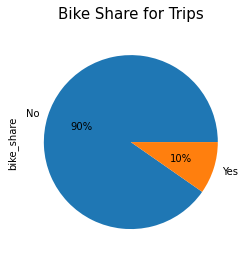

In [53]:
bikeshare = df['bike_share'].value_counts()
bikeshare.plot(
    kind='pie', autopct='%1.0f%%')
plt.title("Bike Share for Trips",{'fontsize': 15},pad=15)

Majority of the users didn't share their ride for their trips. 90% of users did not share their ride while 10% only share their ride

Text(0.5, 1.0, 'User Types')

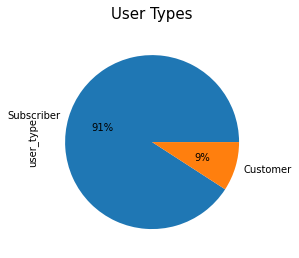

In [54]:
users = df['user_type'].value_counts()
users.plot(
    kind='pie',  autopct='%1.0f%%')
plt.title("User Types",{'fontsize': 15},pad=15)

Majority of the users were subscriber. This shows that 91% of the users were subscribers while 9% were casual users (customers)

In [55]:
df.distance.describe()

count    171494.000000
mean          1.724129
std           1.081175
min           0.010000
25%           0.940000
50%           1.450000
75%           2.250000
max          69.470000
Name: distance, dtype: float64

The average distance covered is 1.45km

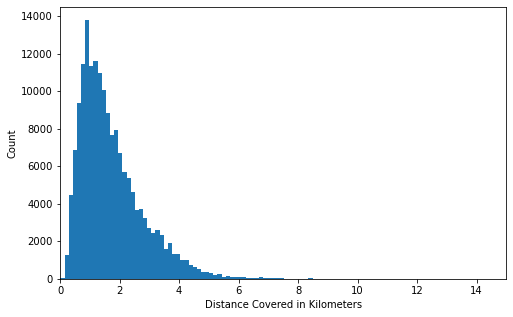

In [56]:
# Distance graph between 0 to 13 kilometers
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance', bins = 500)
plt.xlim([0,15.0])
plt.xlabel('Distance Covered in Kilometers')
plt.ylabel('Count');
plt.show()

The bike sharing was mostly used by the users for short distance between 0 to 4 kilometers. 

In [57]:
df.user_age.describe()

count    171494.000000
mean         34.195278
std          10.084265
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: user_age, dtype: float64

The average age of riders is 32 years

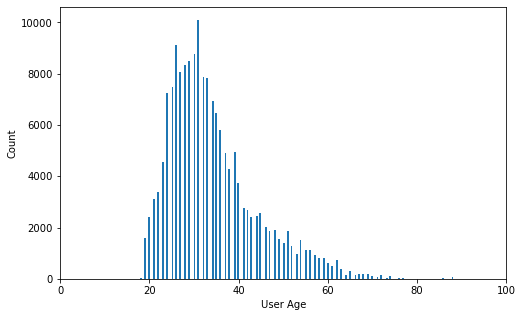

In [58]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'user_age', bins = 300)
plt.xlim([0,100])
plt.xlabel('User Age')
plt.ylabel('Count');
plt.show()

Majority of the users are between the ages of 20 and 40. Users below 40 tends to use the systems more than users above 40. 

Text(0.5, 1.0, 'Member Gender')

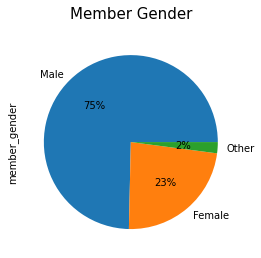

In [59]:
gender = df['member_gender'].value_counts()
gender.plot(
    kind='pie',  autopct='%1.0f%%')
plt.title("Member Gender",{'fontsize': 15},pad=15)

Majority of the bike sharing users are male. 75% of the users are Male, 23% were female and 2% others. This indicates that Male users tends to use the bike sharing system as compared to female and other users

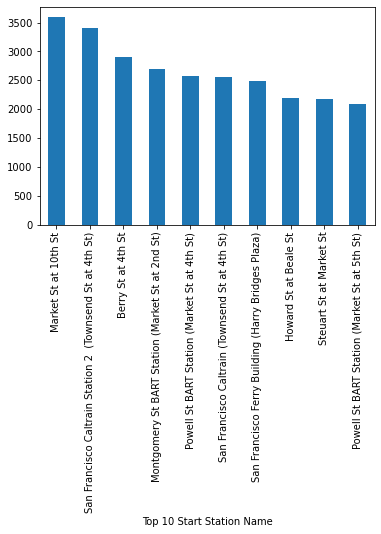

In [60]:
#Get the top 10 start station names with the highest ride
top_start = df['start_station_name'].value_counts().head(10)
top_start.plot.bar()
plt.xlabel('Top 10 Start Station Name')
plt.show()

Most users use the bike rides in Market St. at 10 St station. Market Street is a major thoroughfare in San Francisco, California. 

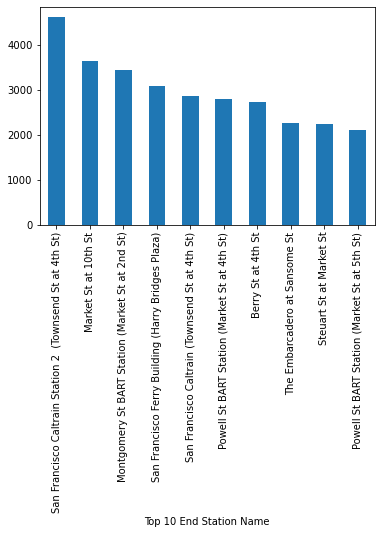

In [61]:
#Get the top 10 end station names with the highest ride
end_start = df['end_station_name'].value_counts().head(10)
end_start.plot.bar()
plt.xlabel('Top 10 End Station Name')
plt.show()

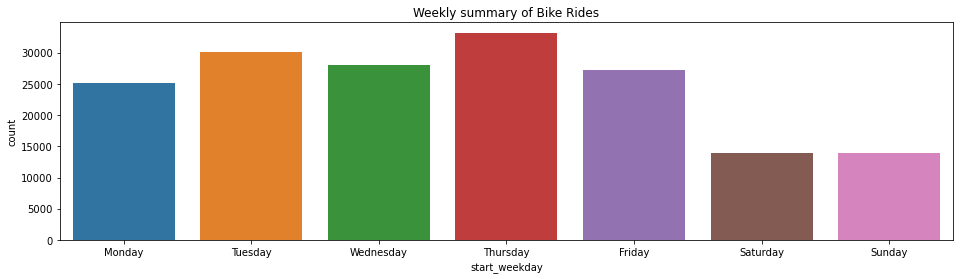

In [62]:
#Get the weekly summary of Bike Rides
plt.figure(figsize=(16,4))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sb.countplot(x=df.start_weekday, order=week_key)
ax.set_title("Weekly summary of Bike Rides")
plt.show()

Most of the rides occurred during week days (Monday through Friday). There are more bike users on Thursdays compared to other weekdays This indicates that it was mostly used for commuting to work as there are low turn outs on Weekends.  

In [63]:
df.duration_minutes.describe()

count    171494.000000
mean         11.368509
std          25.574196
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_minutes, dtype: float64

The average duration of trips in minutes is  approximately 8 minutes.

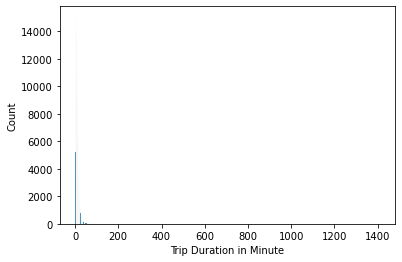

In [64]:
#Get the distributions of Durations in Minutes for bike rides
sb.histplot(data=df, x='duration_minutes');
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');

This shows that the durations in minutes mostly falls in between 0 and 80. This can be further reduced to show the durations between 0 and 100 minutes

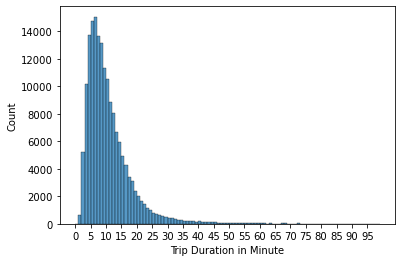

In [65]:
bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
sb.histplot(data=df, x='duration_minutes', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

The bike sharing is mostly used for trips with less duration in minutes between 0 and 15 minutes

In [66]:
#Remove outliers in distance_covered, duration_mins and user_age
df = df.query('duration_minutes <= 70').reset_index(drop=True)
df = df.query('user_age <= 80').reset_index(drop=True)
df = df.query('distance <= 8').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170355 entries, 0 to 170354
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   start_station_id    170355 non-null  int64   
 1   start_station_name  170355 non-null  object  
 2   end_station_id      170355 non-null  int64   
 3   end_station_name    170355 non-null  object  
 4   bike_id             170355 non-null  int64   
 5   user_type           170355 non-null  category
 6   member_gender       170355 non-null  object  
 7   bike_share          170355 non-null  object  
 8   distance            170355 non-null  float64 
 9   start_weekday       170355 non-null  object  
 10  duration_minutes    170355 non-null  int64   
 11  user_age            170355 non-null  int64   
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 14.5+ MB


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Most of the users do not share rides during their trips
- There were more male users than female users
- Majority of the users were subscribers as opposed to casual users
- Majority of the rides occured during the week days primarily used for commuting to work
- Majority of the trips covers short distances usually between 0.1 to 2 kilometers
- Majority of the trips were short lasting between 5 and 15 minutes
- Majority of the users were between the age of 25 and 40


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the analysis, some features shows unusual distributions such as user_age, duration_minutes and distance_covered. There were outliers in user_age with 141 years and duration_minutes with 1409mins approximately 24 hours showing that the ride lasted for a day. Also there was outlier in the distance covered with 69.47km which is usually not normal for a bike ride. To tidy the data showing most bike rides, I filtered out the outliers in distance, age and duration in minutes

## Bivariate Exploration


- Distance covered between rides with respect to bike share (Yes and No)?
- Relationship between distance covered and duration in minutes used for the distance covered
- Relationship between user age and the distance covered of the bike rides. 
- Relationship between user age and the duration in minutes used. 
- Distance covered between rides with respect to user type (Customers and Subscribers)?
- Duration spent in minutes with respect to start days of the week
- Distance covered with respect to start days of the week
- Duration spent in minutes with respect to member gender
- Weekly usage based on user type (customers and subscribers)

In [67]:
sample = df.sample(n=500, replace=True, random_state=22)

#store the sample dataframe in csv
sample.to_csv('sample.csv', index=False);

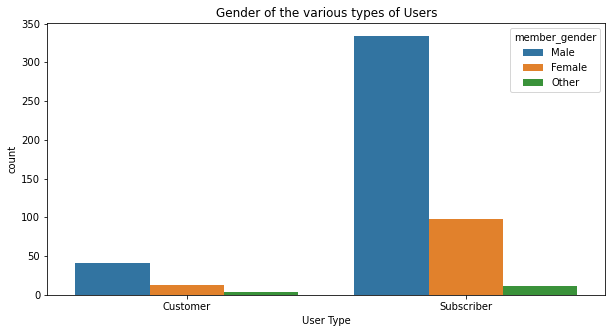

In [68]:
plt.figure(figsize = (10, 5))
sb.countplot(data = sample, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.title('Gender of the various types of Users');

Male riders make up the majority of "subscribers" and "customers" user type.

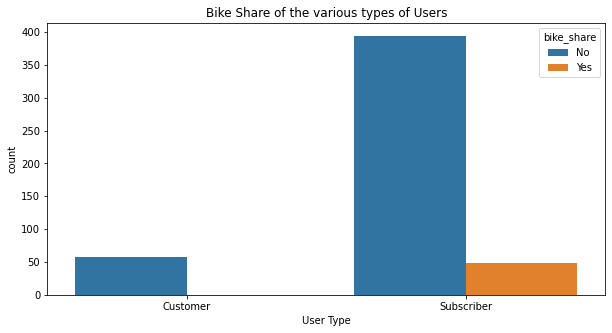

In [69]:
plt.figure(figsize = (10, 5))
sb.countplot(data = sample, x = 'user_type', hue = 'bike_share')
plt.xlabel('User Type')
plt.title('Bike Share of the various types of Users');

VisualizationVisualization

<Figure size 720x720 with 0 Axes>

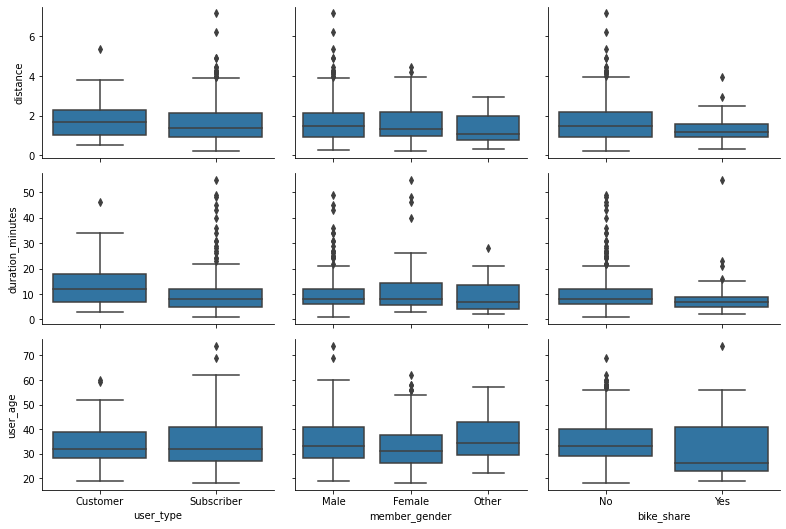

In [73]:
def boxgrid(x, y, **kwargs):
     default_color = sb.color_palette()[0]
     sb.boxplot(x=x, y=y, color=default_color)
    
plt.figure(figsize=[10,10])
cat_vars = ['user_type', 'member_gender', 'bike_share']
key_numeric_vars = ['distance', 'duration_minutes', 'user_age']
g = sb.PairGrid(data=sample, x_vars=cat_vars, y_vars=key_numeric_vars, height=2.5, aspect=1.5)
g.map(boxgrid)
plt.show();

- Users who are "Customers" typically do longer bike trips than users who are "Subscribers."
- In general, female cyclists do longer bike trips than male cyclists. 
- The typical age of "Subscriber" and "Customer" type riders is similar.
- Male bikers tend to be older than female riders on average.
- On average, compared to riders who utilized the bike the entire time, those who did not share it for their travels had longer trips and were older.
- On average, users who are "Customers" traveled farther by bicycle than users who are ‘Subscriber’.
- In comparison to male and female riders, other riders' gender traveled farther on their bike trips on average.
- In general, riders who did not utilize a bike share service traveled farther on their bicycle trips than those who do. 

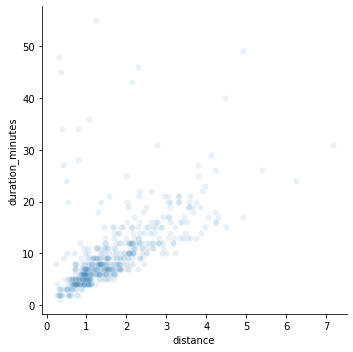

In [87]:
sb.relplot(x='distance', y='duration_minutes', data=sample, kind='scatter', alpha=0.1);

The chart shows that there is a linear relationships between the distance covered and the duration in minutes used for the trips. There seems to be a good relationship between distance and duration in minutes.

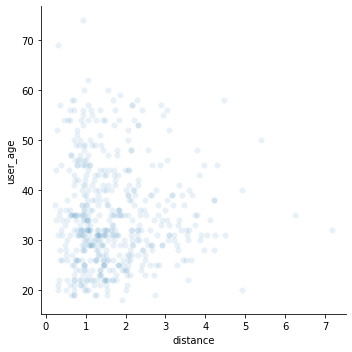

In [86]:
sb.relplot(x='distance', y='user_age', data=sample, kind='scatter', alpha=0.1);

From the chart it is evident that there is no linear relationship between duration and age.

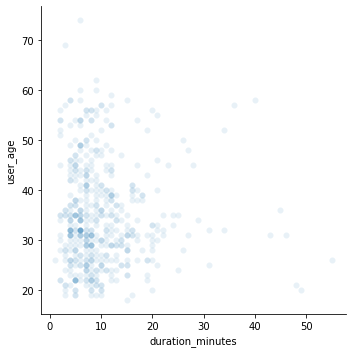

In [85]:
sb.relplot(x='duration_minutes', y='user_age', data=sample, kind='scatter', alpha=0.1);

From the chart it is evident that there is no linear relationship between duration in minutes and age.

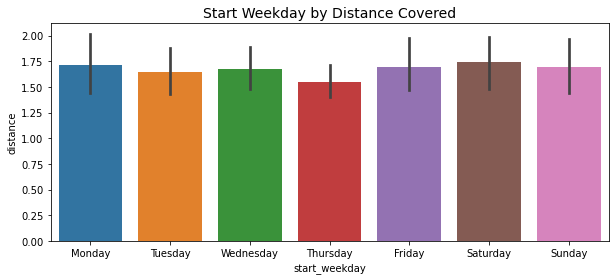

In [77]:
plt.figure(figsize=(10,4))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(x='start_weekday', y="distance", data=sample, order=week_key)
plt.title('Start Weekday by Distance Covered', fontsize=14);

On average, bike rides on weekends (Sat-Sun) covered longer distances as compared to bike rides on other weekdays (Mon-Fri).

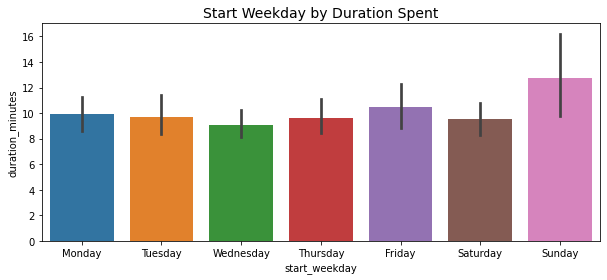

In [78]:
plt.figure(figsize=(10,4))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(x='start_weekday', y="duration_minutes", data=sample, order=week_key)
plt.title('Start Weekday by Duration Spent', fontsize=14);

On average, bike rides on weekends (Sat-Sun) have longer durations in minutes as compared to bike rides on other weekdays (Mon-Fri).

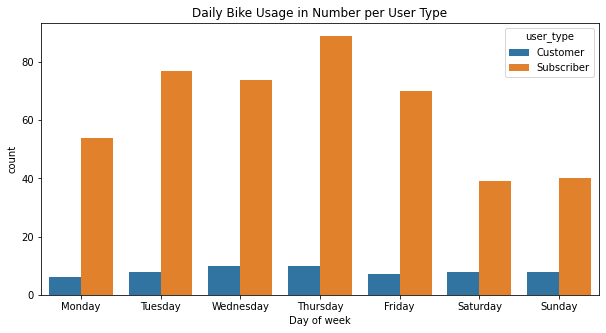

In [79]:
plt.figure(figsize = (10, 5))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = sample, x = 'start_weekday', hue = 'user_type', order=week_key)
plt.xlabel('Day of week')
plt.title('Daily Bike Usage in Number per User Type');

Overall, Subscribers have higher number of trips than customers across all days of the week. Moreover, Thursday has the most ‘Subscriber’ and ‘Customer’ bikers compared to other days. Weekends has highest numbers of customer users. 

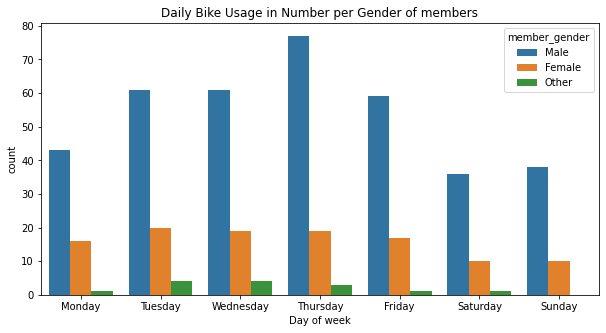

In [80]:
plt.figure(figsize = (10, 5))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data = sample, x = 'start_weekday', hue = 'member_gender', order=week_key)
plt.xlabel('Day of week')
plt.title('Daily Bike Usage in Number per Gender of members');

Compared to other days, Thursday has the most male bikers while Tuesday has the most female bikers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> -  Male riders make up the majority of "subscribers" and "customers" user type.
> - Users who are "Customers" typically do longer bike trips than users who are "Subscribers."
> - In general, female cyclists do longer bike trips than male cyclists. 
> - The typical age of "Subscriber" and "Customer" type riders is similar.
> - Male bikers tend to be older than female riders on average.
> - On average, compared to riders who utilized the bike the entire time, those who did not share it for their travels had longer trips and were older.
> - On average, users who are "Customers" traveled farther by bicycle than users who are ‘Subscriber’.
> - In comparison to male and female riders, other riders' gender traveled farther on their bike trips on average.
> - In general, riders who did not utilize a bike share service traveled farther on their bicycle trips than those who do. 
> - There is a positive linear relationships between the distance covered and the duration in minutes used for the trips. As the distance covered increases, the duration in minutes spent increases. 
> - On average, bike rides on weekends (Sat-Sun) covered longer distances as compared to bike rides on other weekdays (Mon-Fri).
> - On average, bike rides on weekends (Sat-Sun) have longer durations in minutes as compared to bike rides on other weekdays (Mon-Fri).
> - Overall, Subscribers have higher number of trips than customers across all days of the week. Moreover, Thursday has the most ‘Subscriber’ and ‘Customer’ bikers compared to other days. Weekends has highest numbers of customer users. 
> - Compared to other days, Thursday has the most male bikers while Tuesday has the most female bikers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - A very tiny percentage of subscriber riders have utilized bike share for their whole trip, compared to all of the customer riders, who have not used it at all for the entirety of their journey. 
> - There is age-related differences between journeys with and without bike sharing throughout the entirety of the trip. Older subscriber users tends to share bikes compared with younger users.

## Multivariate Exploration


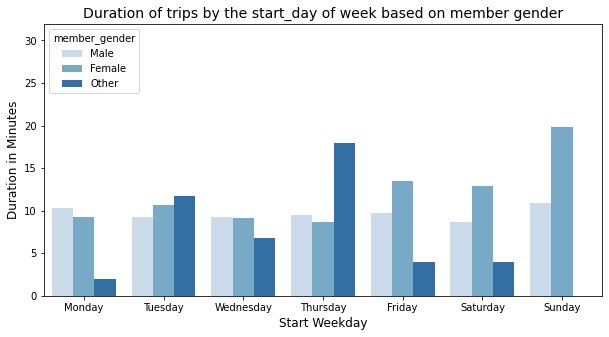

In [81]:
plt.figure(figsize=(10,5))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(data=sample, x='start_weekday', y='duration_minutes', hue='member_gender', order=week_key, palette='Blues', errwidth=0)
plt.xlabel('Start Weekday', fontsize=12)
plt.ylabel('Duration in Minutes', fontsize=12)
plt.title("Duration of trips by the start_day of week based on member gender", fontsize=14);

The average bike trip lasts longer for female riders than for male riders. In comparison to other days, female riders' typical bike trips last longer on Saturdays. 

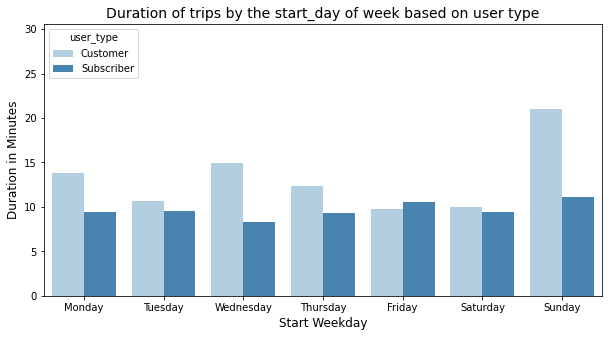

In [82]:
plt.figure(figsize=(10,5))
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(data=sample, x='start_weekday', y='duration_minutes', hue='user_type', order=week_key, palette='Blues', errwidth=0)
plt.xlabel('Start Weekday', fontsize=12)
plt.ylabel('Duration in Minutes', fontsize=12)
plt.title("Duration of trips by the start_day of week based on user type", fontsize=14);

The average bike trip lasts longer for customers than for subscribers. In comparison to other days, customers' typical bike trips last longer on weekends. 

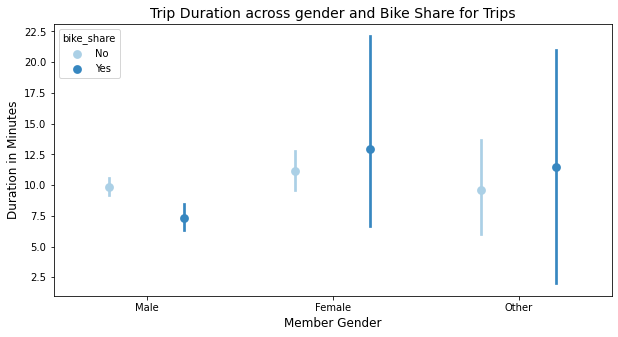

In [83]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = sample, x ='member_gender', y = 'duration_minutes', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and Bike Share for Trips', fontsize=14)
plt.xlabel('Member Gender', fontsize=12)
plt.ylabel('Duration in Minutes', fontsize=12)
plt.show();

In both bike-sharing and non-bike-sharing trips, the riders with other gender travels for the longest time followed by the female riders and then the male riders.

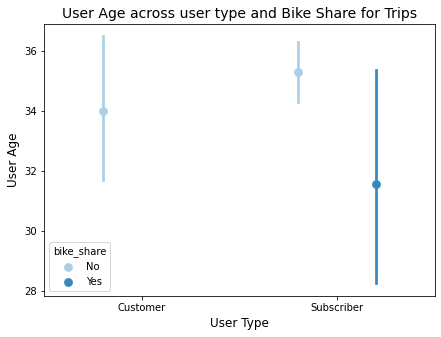

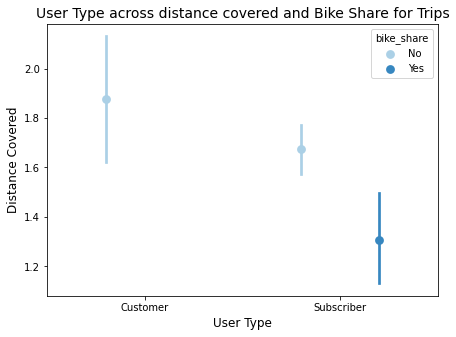

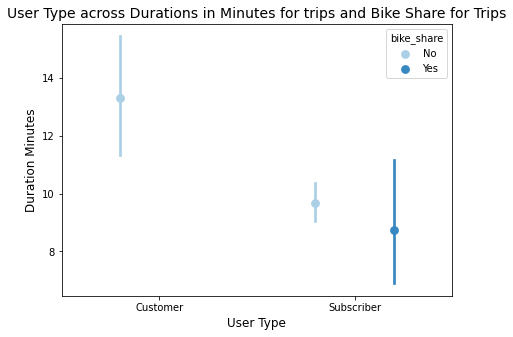

In [84]:
fig = plt.figure(figsize = [7,5])
ax = sb.pointplot(data = sample, x ='user_type', y = 'user_age', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('User Age across user type and Bike Share for Trips', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('User Age', fontsize=12)

fig = plt.figure(figsize = [7,5])
ab = sb.pointplot(data = sample, x ='user_type', y = 'distance', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('User Type across distance covered and Bike Share for Trips', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Distance Covered', fontsize=12)

fig = plt.figure(figsize = [7,5])
ab = sb.pointplot(data = sample, x ='user_type', y = 'duration_minutes', hue = 'bike_share',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('User Type across Durations in Minutes for trips and Bike Share for Trips', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration Minutes', fontsize=12)

plt.show();

Generally, customer user type are older users who travelled far distances and spend longer durations in minutes in their rides without sharing it with other users. On the contrary, subscribers are middle aged users who travelled short distances within averagely short durations in minutes and majority sharing their bikes. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The average bike trip lasts longer for female riders than for male riders. In comparison to other days, female riders' typical bike trips last longer on Saturdays. 
> - The average bike trip lasts longer for customers than for subscribers. In comparison to other days, customers' typical bike trips last longer on weekends. 
> - In both bike-sharing and non-bike-sharing trips, the riders with other gender travels for the longest time followed by the female riders and then the male riders.

### Were there any interesting or surprising interactions between features?

> There are interesting interactions between user_type, user_age, distance, duration_minutes and bike_share. Generally, customer user type are older users who travelled far distances and spend longer durations in minutes in their rides without sharing it with other users. On the contrary, subscribers are middle aged users who travelled short distances within averagely short durations in minutes and majority sharing their bikes. 

## Conclusions
> The exploratory analysis shows that 91% of the users were subscribers while 9% were casual users (customers). Customer user type are generally older users when compared with Subscribers. Customer users usually use the bike rides to travel far distances which makes them to spend longer duration in minutes to cover their rides. It is also interesting that despite the age and distance covered by customers, they do not share their rides with other people in all their bike trips. Customers' typical bike trips last longer on weekends.

>On the contrary, subscribers are middle aged users (between 20 - 40years) who travelled short distances within averagely short durations in minutes and majorily sharing their bikes. Overall, Subscribers have higher number of trips than customers across all days of the week. Moreover, Thursday has the most ‘Subscriber’ and ‘Customer’ bikers compared to other days. Majority of the subscriber who share their rides are male. In general, female riders do longer bike trips than male riders and therefore do not share their rides. 